In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
%cd C:\Users\purvi\OneDrive\Documents\Projects by me\OASIS projects\Car price prediction

C:\Users\purvi\OneDrive\Documents\Projects by me\OASIS projects\Car price prediction


In [3]:
df = pd.read_csv("car data.csv")

In [4]:
df.head()

Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0

In [5]:
df.sample(5)

Car_Name  Year  Selling_Price  Present_Price  Driven_kms  \
153  Bajaj Pulsar NS 200  2013           0.50           0.99       45000   
3                wagon r  2011           2.85           4.15        5200   
203                  i10  2011           2.95           4.60       53460   
243                  i20  2016           6.25           7.60        7000   
25                 swift  2011           3.00           4.99       20000   

    Fuel_Type Selling_type Transmission  Owner  
153    Petrol   Individual       Manual      0  
3      Petrol       Dealer       Manual      0  
203    Petrol       Dealer       Manual      0  
243    Petrol       Dealer       Manual      0  
25     Petrol       Dealer       Manual      0

# EDA

In [6]:
df.shape

(301, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [9]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [10]:
#There is no null values

In [11]:
df.duplicated().sum()

2

In [12]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [13]:
df['Car_Name'].value_counts()

Car_Name
city                        26
corolla altis               16
verna                       14
brio                        10
fortuner                    10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: count, Length: 98, dtype: int64

In [14]:
df.describe()

Year  Selling_Price  Present_Price     Driven_kms       Owner
count   299.000000     299.000000     299.000000     299.000000  299.000000
mean   2013.615385       4.589632       7.541037   36916.752508    0.043478
std       2.896868       4.984240       8.566332   39015.170352    0.248720
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.850000       1.200000   15000.000000    0.000000
50%    2014.000000       3.510000       6.100000   32000.000000    0.000000
75%    2016.000000       6.000000       9.840000   48883.500000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000

In [15]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

## Visualisation

C:\Users\purvi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\purvi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\purvi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\purvi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

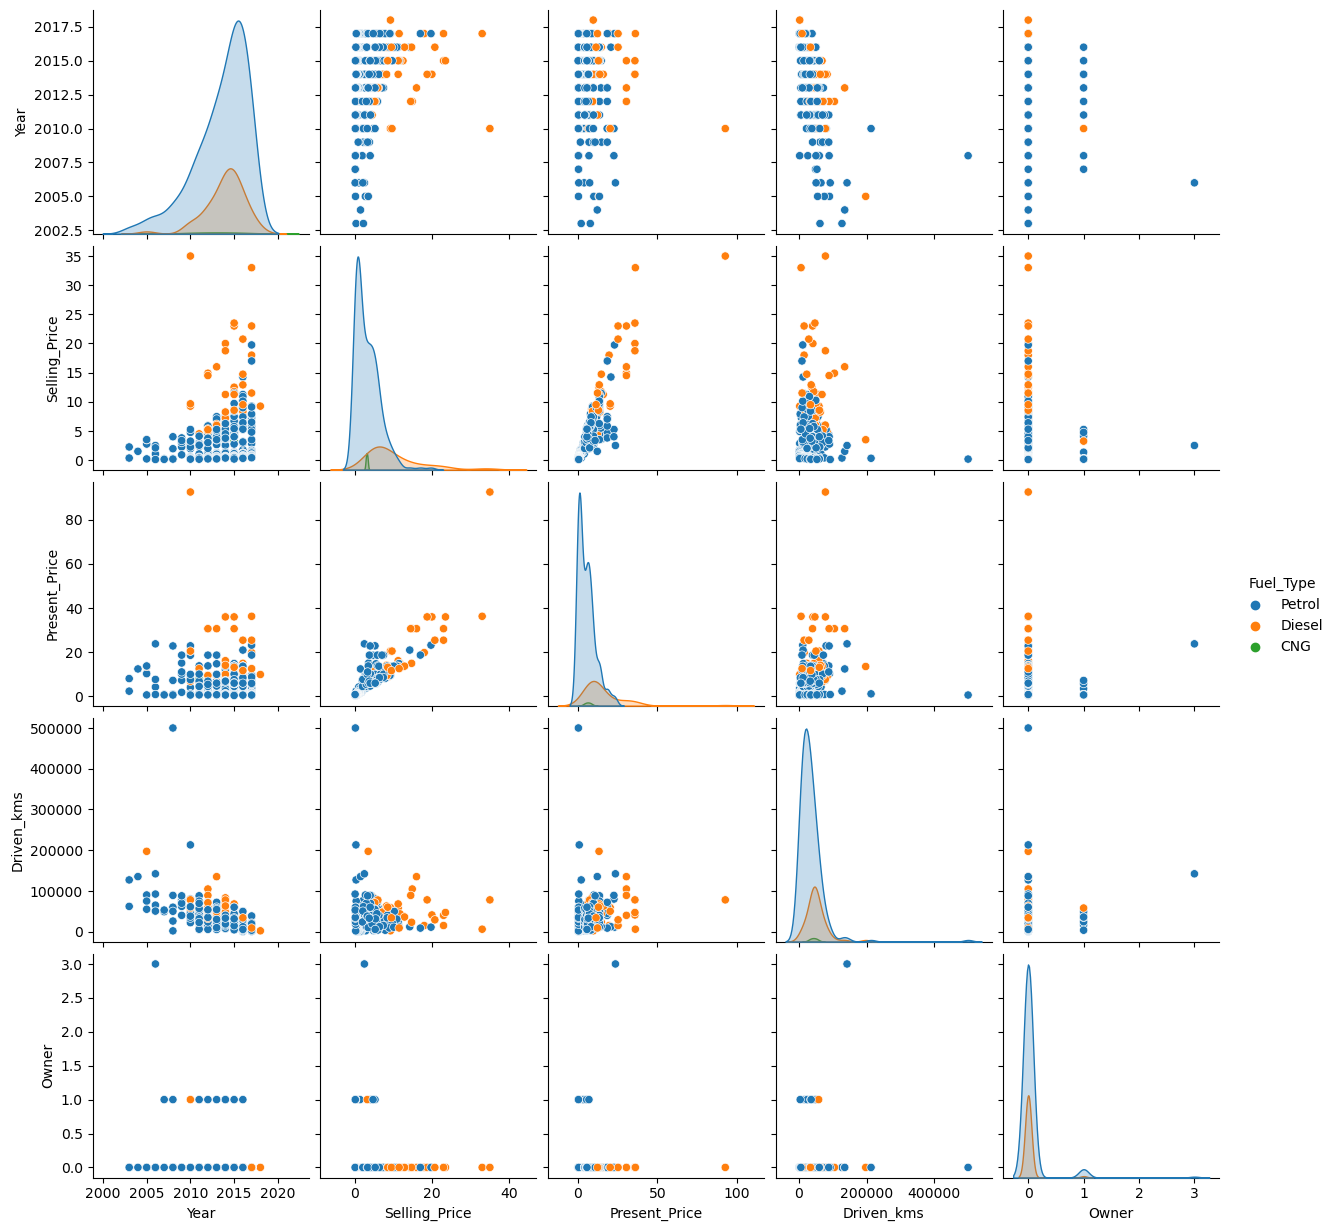

In [16]:
sns.pairplot(df,hue='Fuel_Type')

In [17]:
# extract numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

<Axes: >

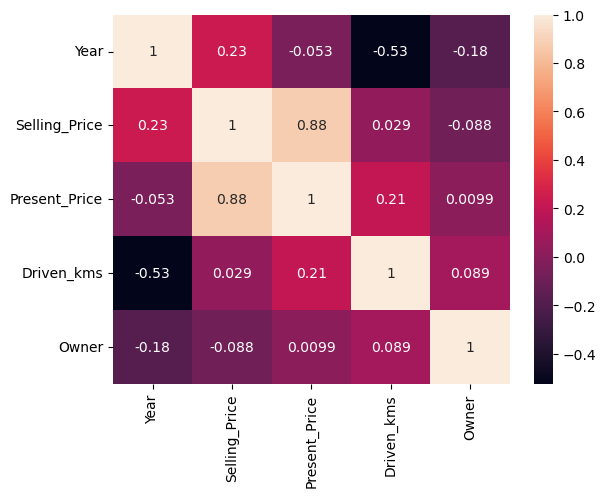

In [18]:
# extract numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
# plot heatmap
sns.heatmap(df[numerical_cols].corr(), annot=True)

As year increase the selling price also tends to increase by 23%
Year has negative impact on present price, driven kms, and owner.

# Line Plot

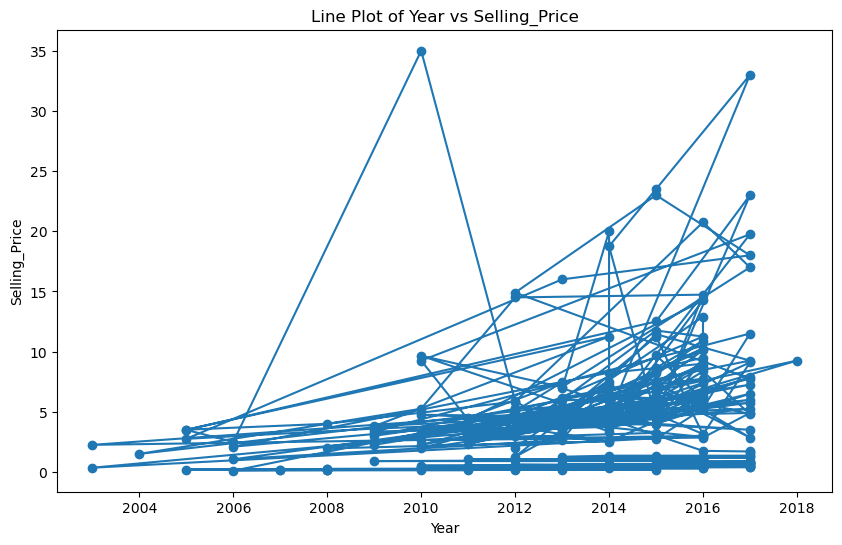

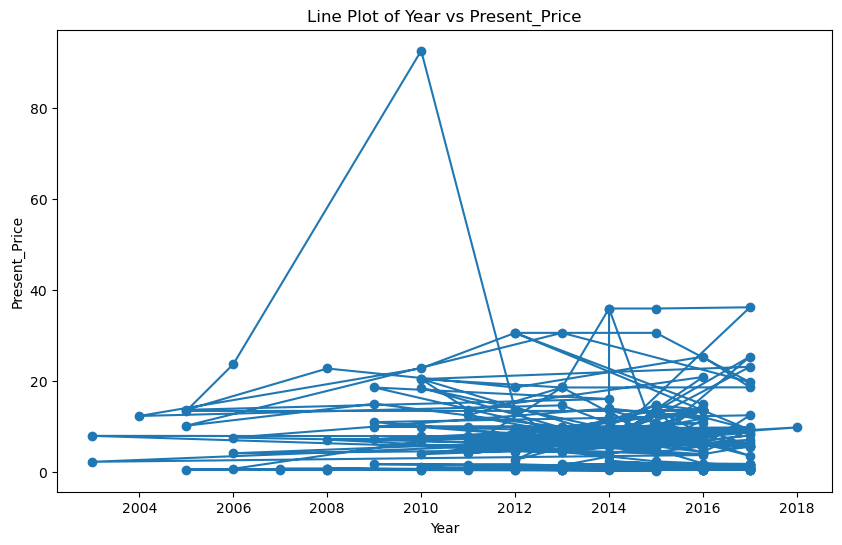

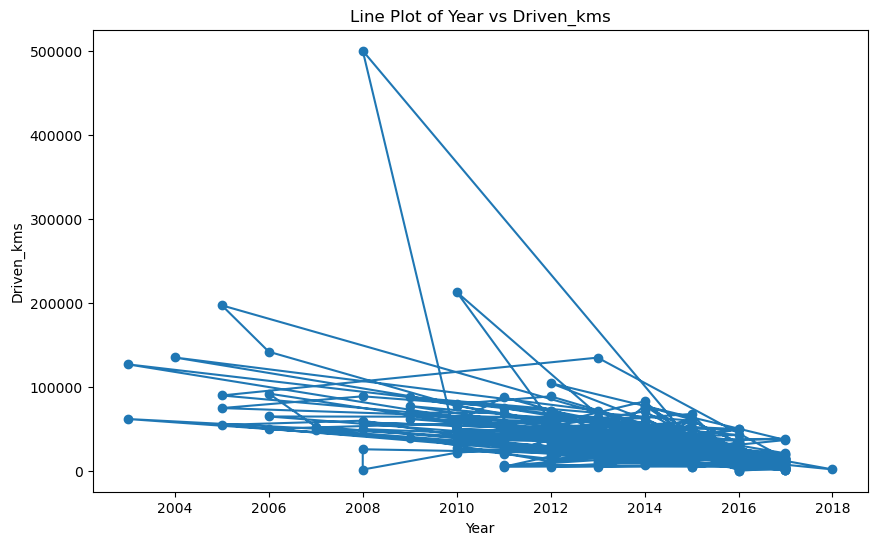

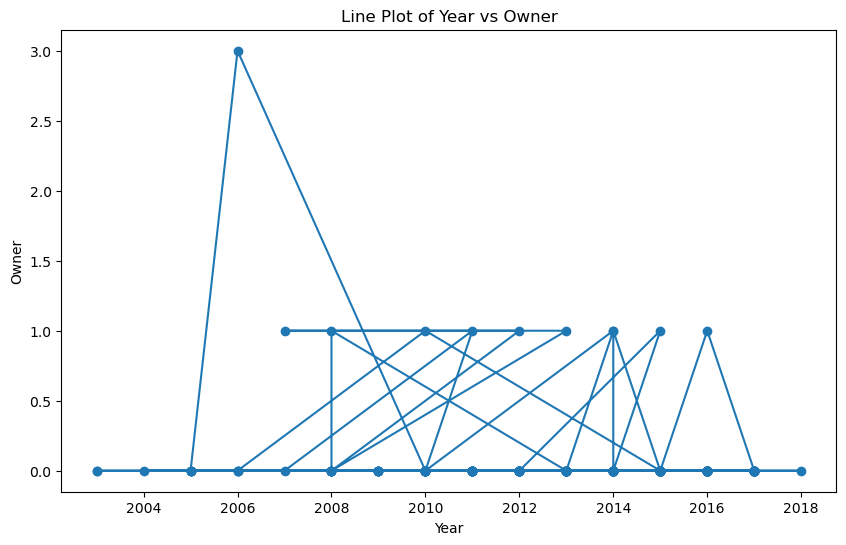

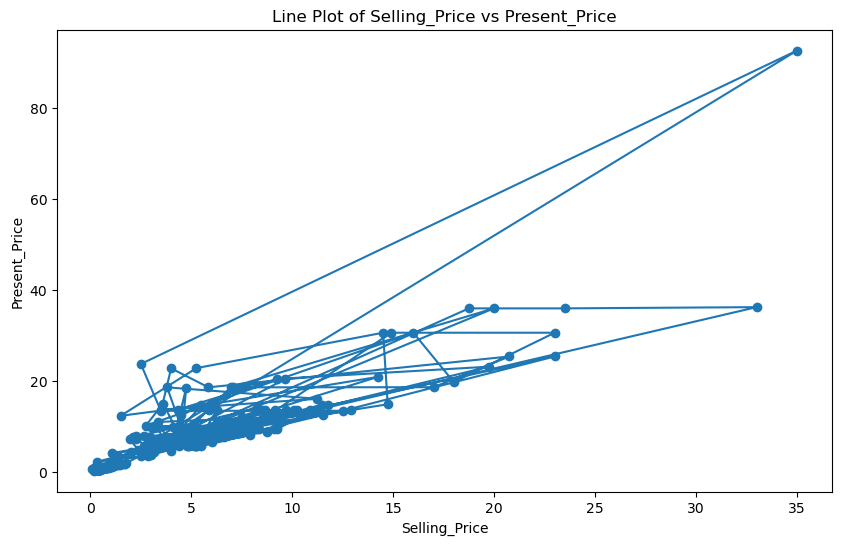

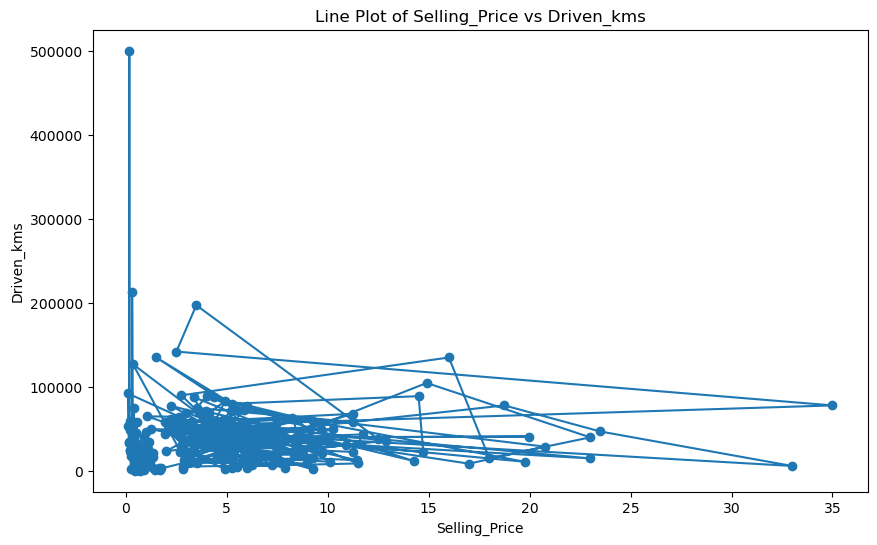

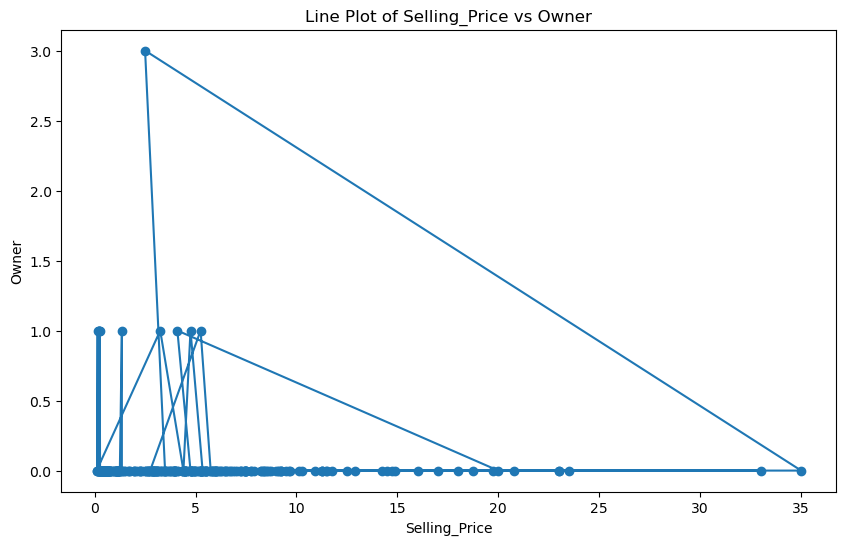

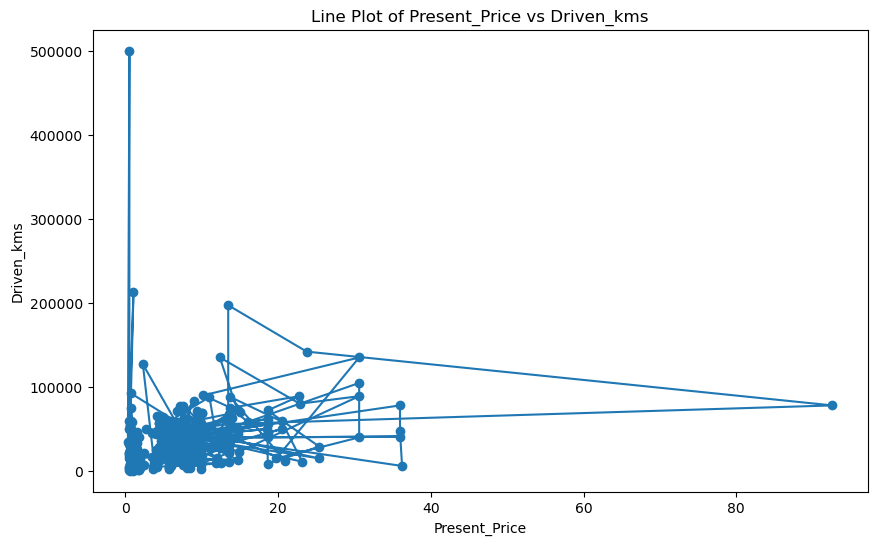

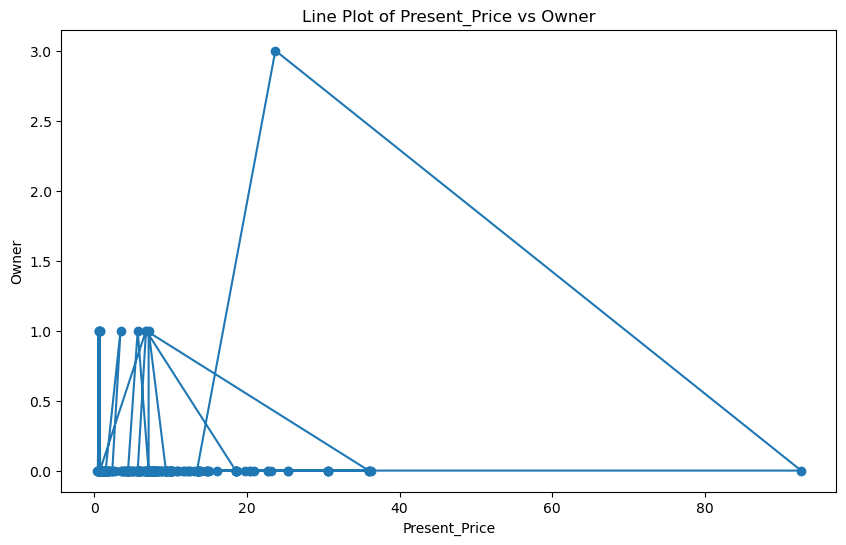

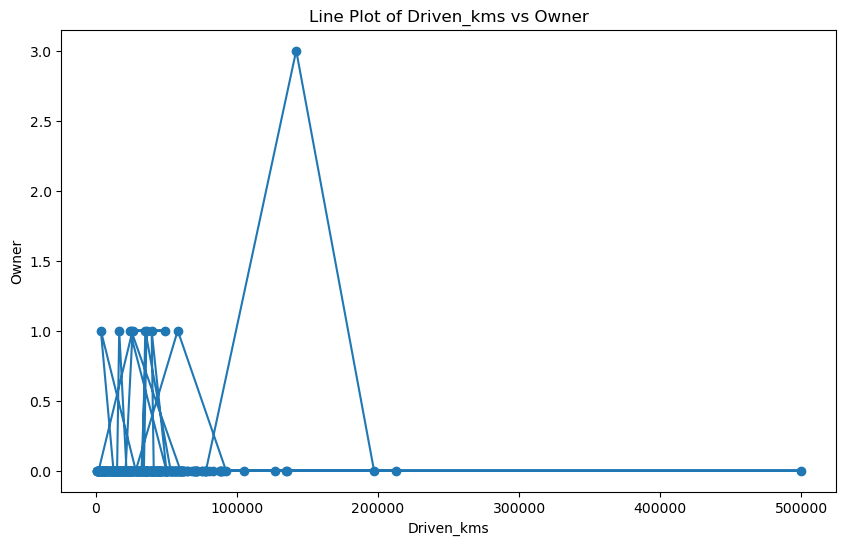

In [19]:
# Plot line plots for each pair of numerical columns
for i, col_x in enumerate(numerical_cols):
    for col_y in numerical_cols[i+1:]:
        plt.figure(figsize=(10, 6))
        plt.plot(df[col_x], df[col_y], marker='o')
        plt.xlabel(col_x)
        plt.ylabel(col_y)
        plt.title(f'Line Plot of {col_x} vs {col_y}')
        plt.show()

## Scatter plot

In [20]:
# List of numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

# Plot scatter plots for each pair of numerical columns
for i, col_x in enumerate(numerical_cols):
    for col_y in numerical_cols[i+1:]:
        fig = px.scatter(df, x=col_x, y=col_y, title=f'Scatter Plot of {col_x} vs {col_y}')
        fig.show()

## Box plot

#plot histogram of each categorical column using matplotlib

In [21]:
# extract categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns


In [22]:
# box plot of categorical columns vs numerical columns
for col_x in categorical_cols:
    for col_y in numerical_cols:
        fig = px.box(df, x=col_x, y=col_y, title=f'Box Plot of {col_x} vs {col_y}')
        fig.show()

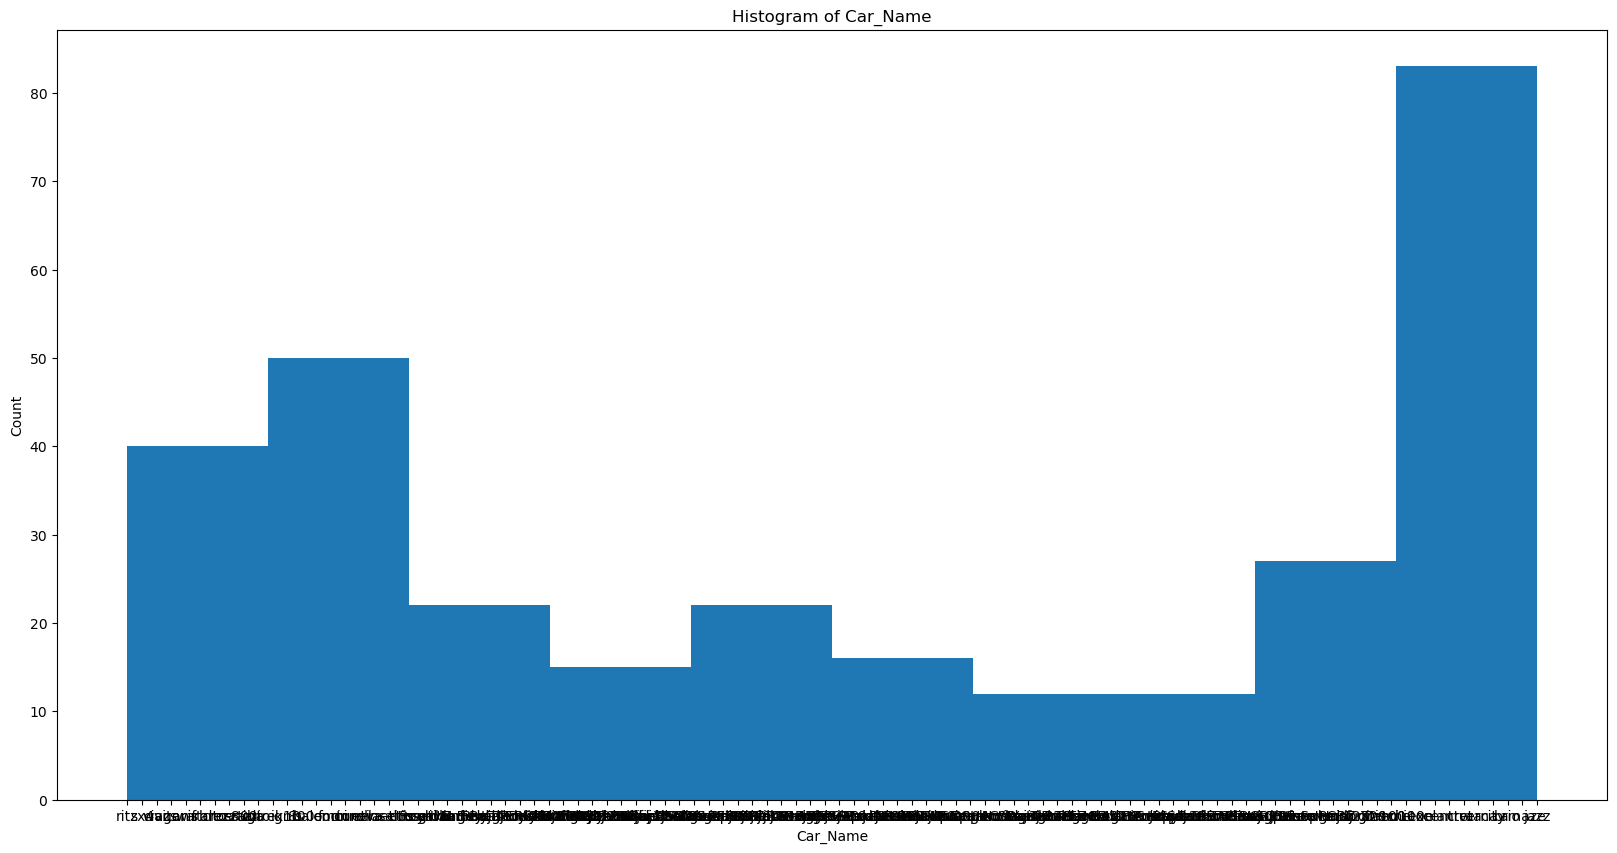

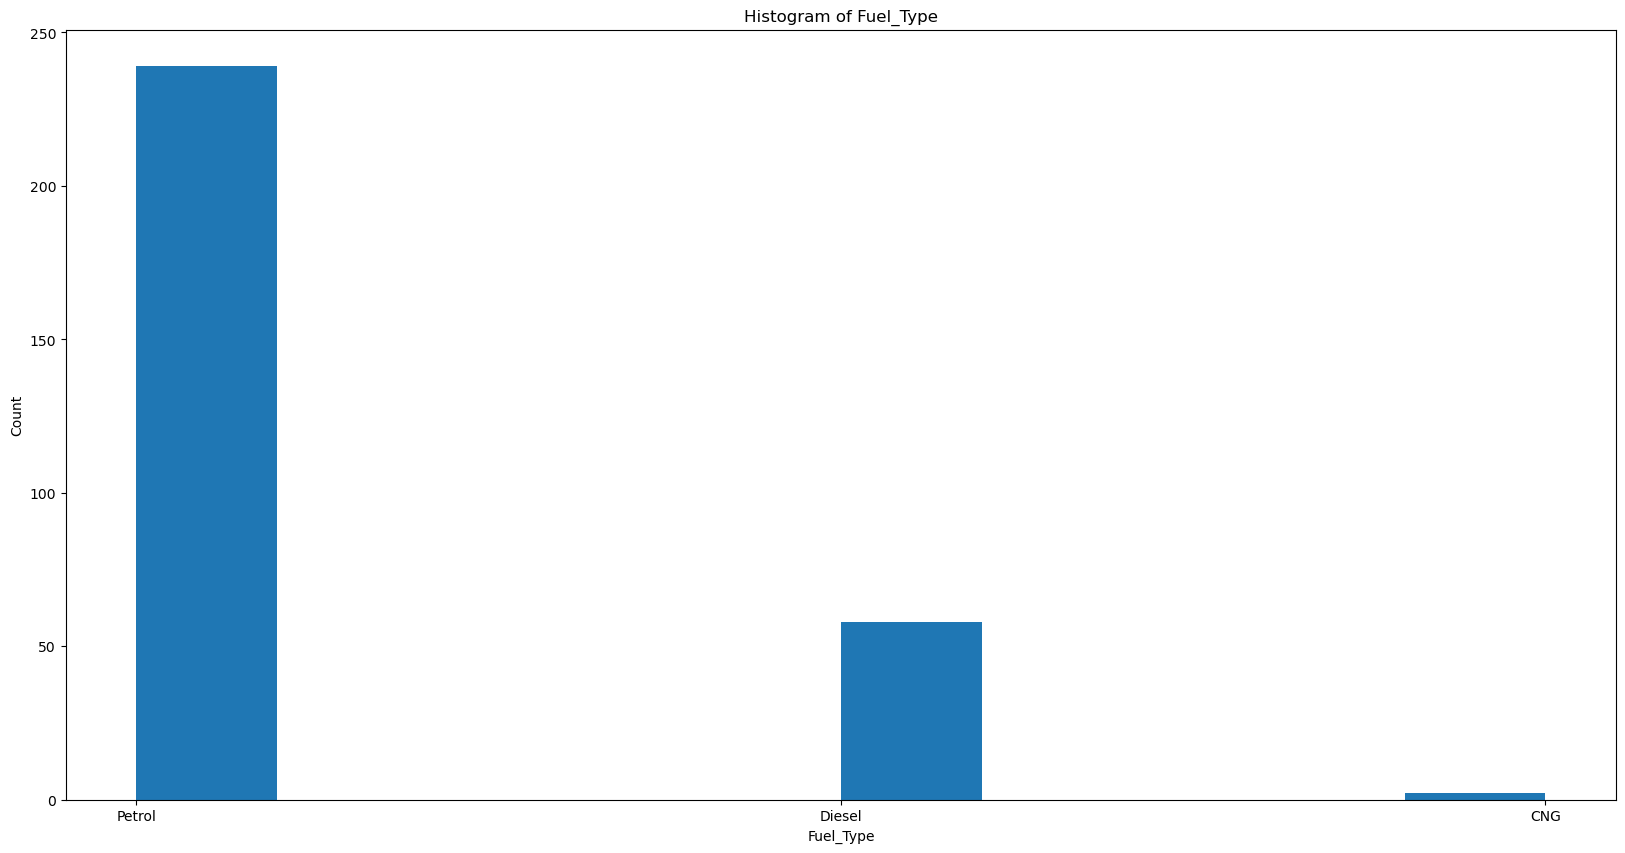

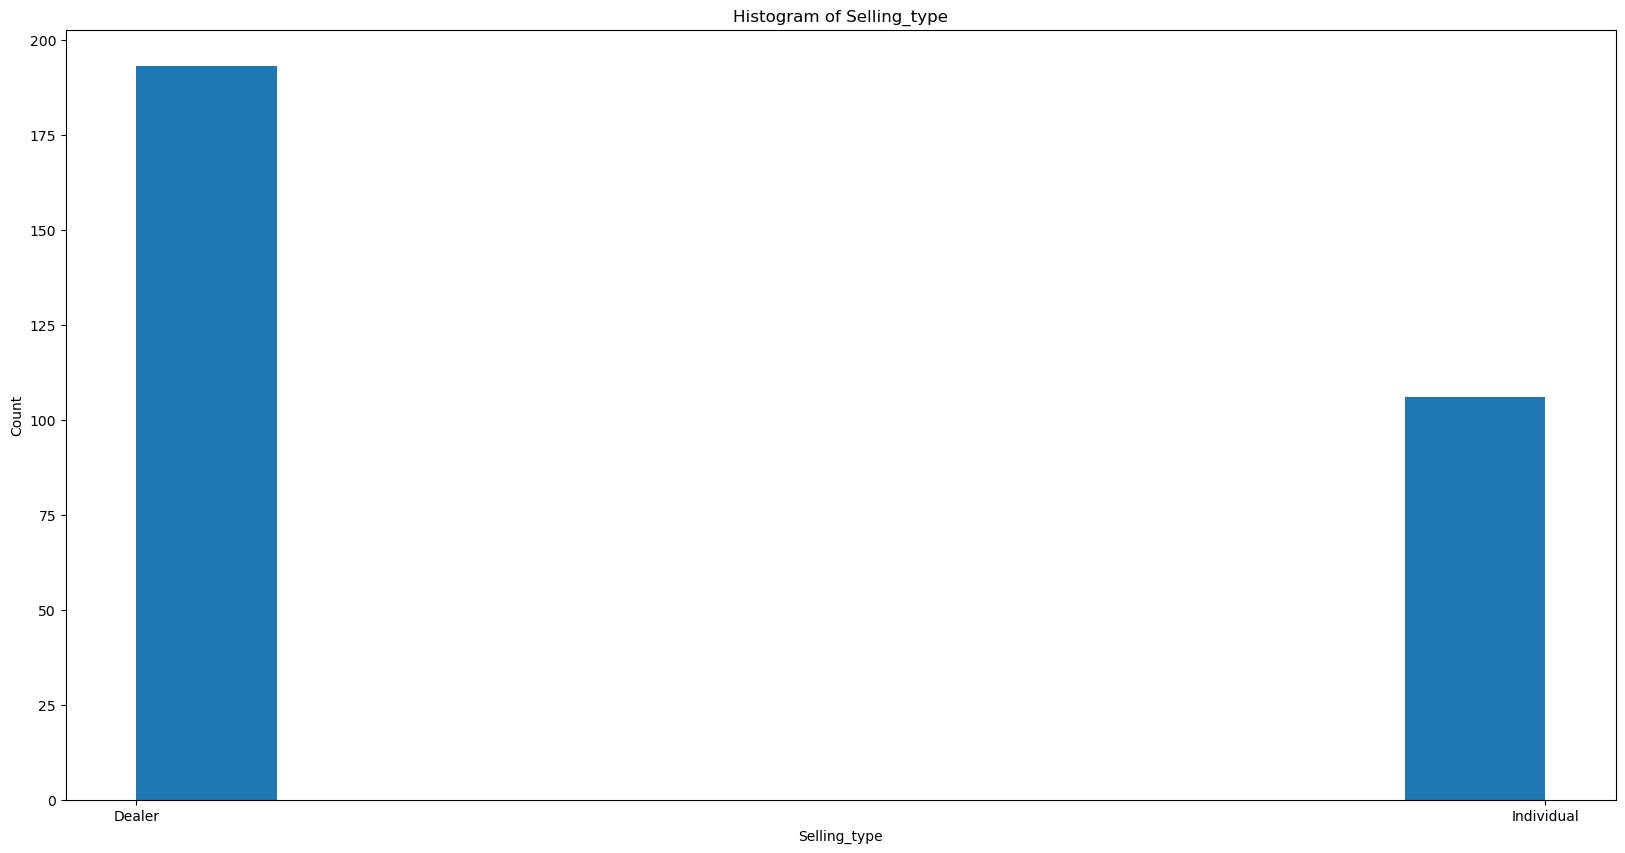

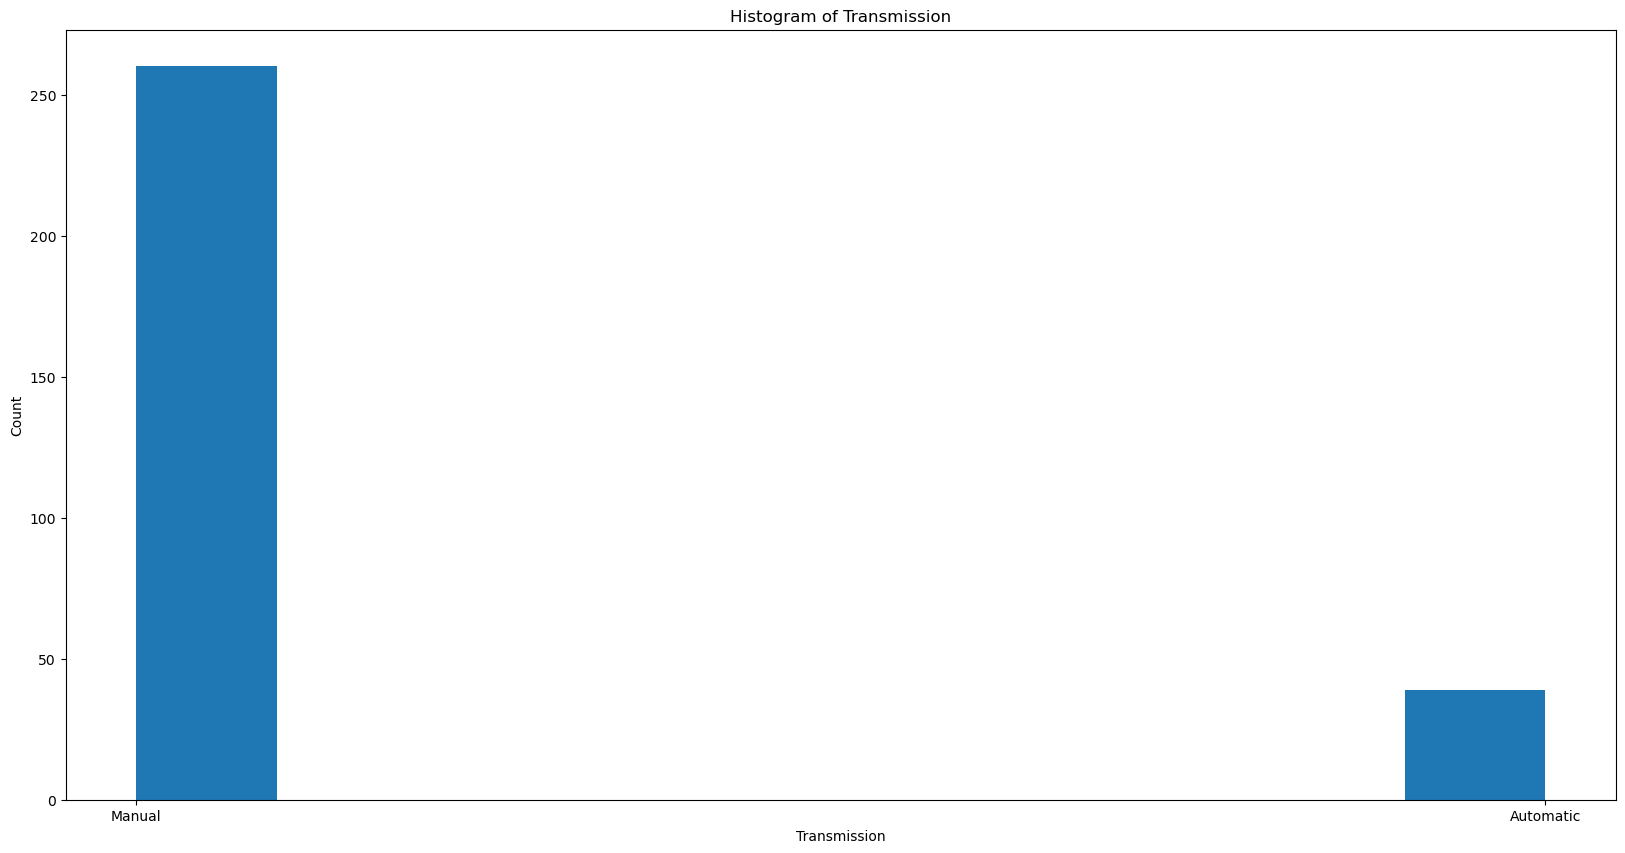

In [23]:
# plot histogram of each categorical column using matplotlib
for col in categorical_cols:
    plt.figure(figsize=(20, 10))
    plt.hist(df[col])
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Histogram of {col}')
    plt.show()

## Encoding

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    int64  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Driven_kms     299 non-null    int64  
 5   Fuel_Type      299 non-null    object 
 6   Selling_type   299 non-null    object 
 7   Transmission   299 non-null    object 
 8   Owner          299 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 23.4+ KB


In [25]:
## label encoder
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
df['Car_Name'] = le.fit_transform(df['Car_Name'])
df['Fuel_Type'] = le.fit_transform(df['Fuel_Type'])
df['Selling_type'] = le.fit_transform(df['Selling_type'])
df['Transmission'] = le.fit_transform(df['Transmission'])

In [26]:
df.head()

Car_Name  Year  Selling_Price  Present_Price  Driven_kms  Fuel_Type  \
0        90  2014           3.35           5.59       27000          2   
1        93  2013           4.75           9.54       43000          1   
2        68  2017           7.25           9.85        6900          2   
3        96  2011           2.85           4.15        5200          2   
4        92  2014           4.60           6.87       42450          1   

   Selling_type  Transmission  Owner  
0             0             1      0  
1             0             1      0  
2             0             1      0  
3             0             1      0  
4             0             1      0

## Feature Selection

In [27]:
# best feature selection using correlation
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix["Selling_Price"].sort_values(ascending=False)
print("Correlation with target:\n", correlation_with_target)

Correlation with target:
 Selling_Price    1.000000
Present_Price    0.876305
Car_Name         0.501429
Year             0.234369
Driven_kms       0.028566
Owner           -0.087880
Transmission    -0.348869
Fuel_Type       -0.500292
Selling_type    -0.553851
Name: Selling_Price, dtype: float64


In [28]:
# Define a threshold
threshold = 0.5
selected_features = correlation_with_target[abs(correlation_with_target) > threshold].index
print("Selected features:\n", selected_features)

Selected features:
 Index(['Selling_Price', 'Present_Price', 'Car_Name', 'Fuel_Type',
       'Selling_type'],
      dtype='object')


## Scaling

In [29]:
from sklearn.preprocessing import StandardScaler

X = df[selected_features].drop('Selling_Price', axis=1)
y = df['Selling_Price']

# scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.22813821,  1.07634401,  0.49184668, -0.74109567],
       [ 0.23374233,  1.1936136 , -1.88012358, -0.74109567],
       [ 0.26999119,  0.21636698,  0.49184668, -0.74109567],
       ...,
       [ 0.40446274,  0.25545684,  0.49184668, -0.74109567],
       [ 0.57986041,  0.25545684, -1.88012358, -0.74109567],
       [-0.19188936,  0.13818725,  0.49184668, -0.74109567]])

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Selection & Evaluation

In [34]:
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    AdaBoostRegressor
)
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline  

In [36]:
# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42)),
    ('Support Vector Machine', SVR()),
    ('Linear Regression', LinearRegression()),
    ('K-Nearest Neighbors', KNeighborsRegressor()),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Ada Boost', AdaBoostRegressor(random_state=42))
]

# Initialize variables to track the best model and its metrics
best_model = None
best_mse = np.inf  # Initialize with infinity
best_r2 = -np.inf  # Initialize with negative infinity

# Initialize lists to store the results
model_names = []
mse_scores = []
r2_scores = []

# Iterate over the models and evaluate their performance
for name, model in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('model', model)
    ])
    
      # Perform cross-validation
    mse = -cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
    r2 = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2').mean()
    
    # Print the performance metrics
    print("Model:", name)
    print("Cross-validation Mean Squared Error:", mse)
    print("Cross-validation R-squared:", r2)
    print()
    
    # Store the results
    model_names.append(name)
    mse_scores.append(mse)
    r2_scores.append(r2)
    
    # Check if the current model has the best MSE
    if mse < best_mse:
        best_mse = mse
        best_model = pipeline

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Model': model_names,
    'Mean Squared Error': mse_scores,
    'R-squared': r2_scores
})

# Select the best model based on MSE
best_model_name = results_df.loc[results_df['Mean Squared Error'].idxmin(), 'Model']
best_model_row = results_df.loc[results_df['Model'] == best_model_name]

# Print the best model and its metrics
print("\nBest Model (Based on Mean Squared Error):")
print(best_model_row)
print()

Model: Random Forest
Cross-validation Mean Squared Error: 4.537182843907494
Cross-validation R-squared: 0.8013117821077206

Model: Gradient Boosting
Cross-validation Mean Squared Error: 4.647906291221718
Cross-validation R-squared: 0.8020143267079215

Model: Support Vector Machine
Cross-validation Mean Squared Error: 10.059363255275375
Cross-validation R-squared: 0.6317239836360529

Model: Linear Regression
Cross-validation Mean Squared Error: 5.319875326863253
Cross-validation R-squared: 0.7856665238373381

Model: K-Nearest Neighbors
Cross-validation Mean Squared Error: 4.885189814539007
Cross-validation R-squared: 0.792492745207241

Model: Decision Tree
Cross-validation Mean Squared Error: 6.02268770505661
Cross-validation R-squared: 0.7280723704894922

Model: Ada Boost
Cross-validation Mean Squared Error: 4.7432232078162
Cross-validation R-squared: 0.7975062536317571


Best Model (Based on Mean Squared Error):
           Model  Mean Squared Error  R-squared
0  Random Forest         

In [37]:
# Display the results DataFrame
print("Results:")
print(results_df)

Results:
                    Model  Mean Squared Error  R-squared
0           Random Forest            4.537183   0.801312
1       Gradient Boosting            4.647906   0.802014
2  Support Vector Machine           10.059363   0.631724
3       Linear Regression            5.319875   0.785667
4     K-Nearest Neighbors            4.885190   0.792493
5           Decision Tree            6.022688   0.728072
6               Ada Boost            4.743223   0.797506


## Conclusion

#### Overall Random forest and Gradient Boosting working well with the given dataset.